In [30]:
pip install numpy pandas matplotlib datasets


In [31]:
from datasets import load_dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [32]:

# Load the dataset from Hugging Face
dataset = load_dataset("fka/awesome-chatgpt-prompts")

In [33]:

df = pd.DataFrame(dataset['train'])


In [34]:
print(df.head())
print(df.info())


                               act                                             prompt
0            An Ethereum Developer  Imagine you are an experienced Ethereum develo...
1                       SEO Prompt  Using WebPilot, create an outline for an artic...
2                   Linux Terminal  I want you to act as a linux terminal. I will ...
3  English Translator and Improver  I want you to act as an English translator, sp...
4           `position` Interviewer  I want you to act as an interviewer. I will be...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   act     170 non-null    object
 1   prompt  170 non-null    object
dtypes: object(2)
memory usage: 2.8+ KB
None


Average Prompt Length: 469.65294117647056


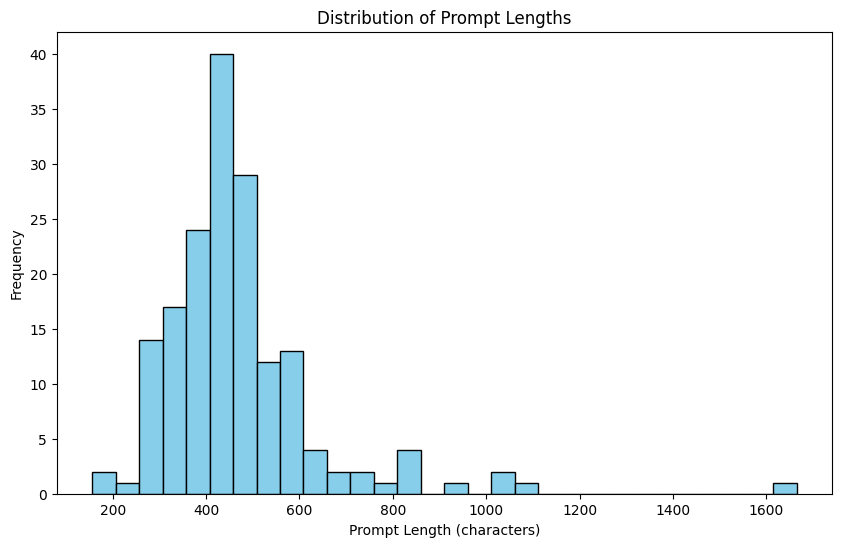

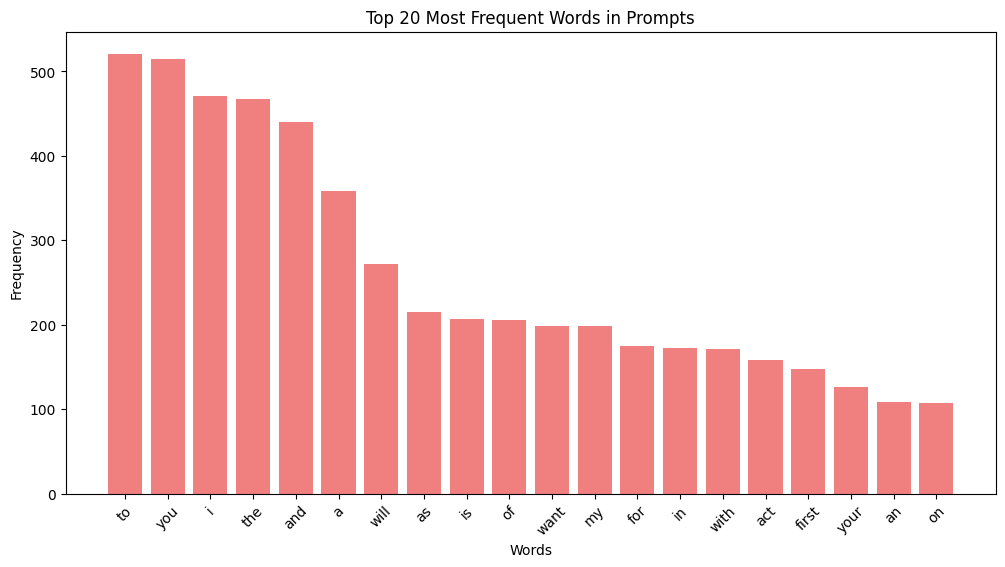

In [35]:
# Assuming 'prompt' is the column that contains the text data
df['prompt_length'] = df['prompt'].apply(len)

# Analysis - Basic Statistics
average_length = np.mean(df['prompt_length'])
print(f"Average Prompt Length: {average_length}")

# Visualization
# Histogram of Prompt Lengths
plt.figure(figsize=(10, 6))
plt.hist(df['prompt_length'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Prompt Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Prompt Lengths')
plt.show()

# Word Frequency Analysis (optional)
# Tokenizing the prompts to count word frequency
from collections import Counter
import re

# Tokenize the prompts
all_words = []
for prompt in df['prompt']:
    words = re.findall(r'\w+', prompt.lower())  # Split words by non-word characters
    all_words.extend(words)

# Count word frequency
word_freq = Counter(all_words)

# Convert to DataFrame for visualization
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)

# Plot the top 20 words
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'], word_freq_df['Frequency'], color='lightcoral')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Prompts')
plt.show()


README.md:   0%|          | 0.00/6.52k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/83.9k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/164 [00:00<?, ? examples/s]

       task_id  ...              entry_point
0  HumanEval/0  ...       has_close_elements
1  HumanEval/1  ...    separate_paren_groups
2  HumanEval/2  ...          truncate_number
3  HumanEval/3  ...               below_zero
4  HumanEval/4  ...  mean_absolute_deviation

[5 rows x 5 columns]
Prompt Length Summary:
count     164.000000
mean      450.597561
std       230.303766
min       115.000000
25%       287.750000
50%       396.000000
75%       568.000000
max      1360.000000
Name: prompt_length, dtype: float64

Solution Length Summary:
count    164.000000
mean     180.865854
std      139.527974
min       16.000000
25%       78.000000
50%      148.500000
75%      241.750000
max      864.000000
Name: solution_length, dtype: float64


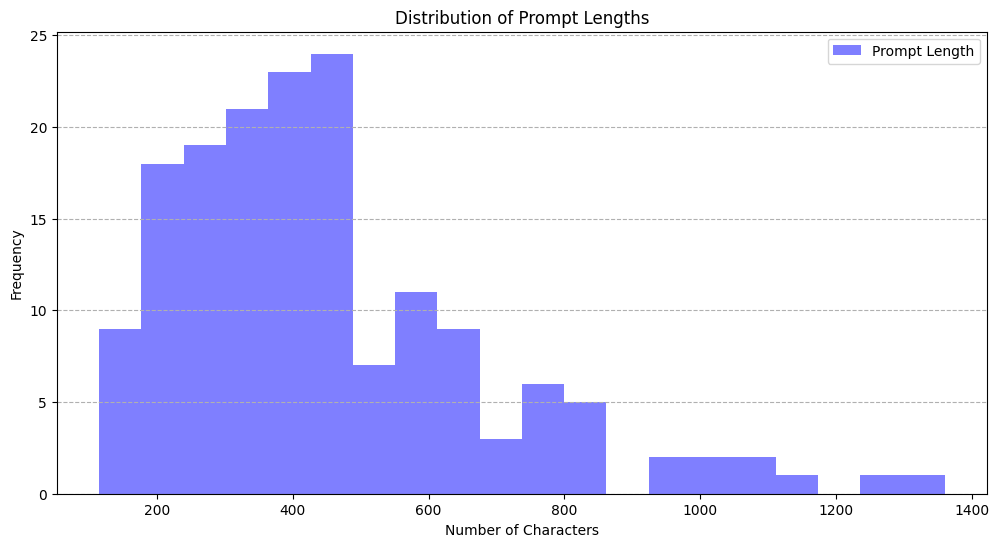

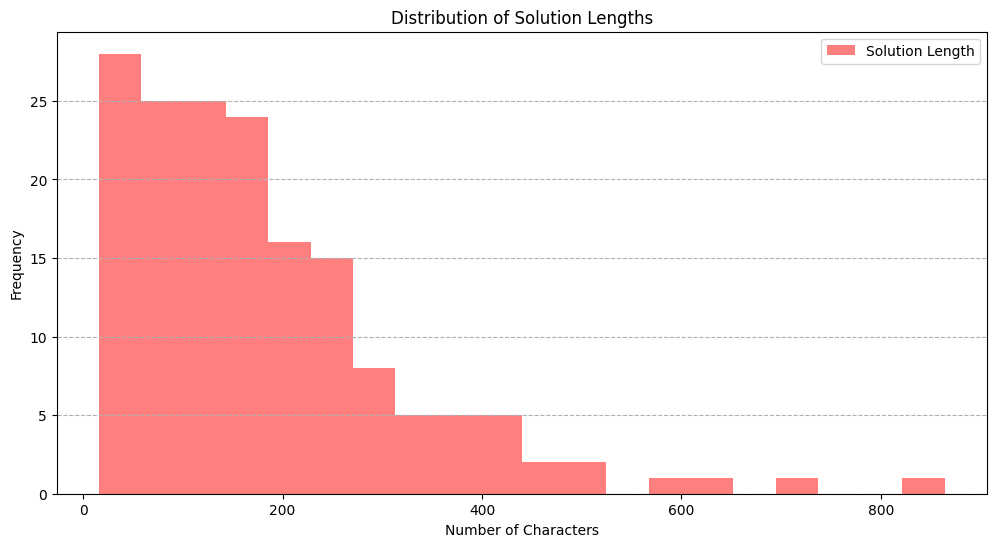

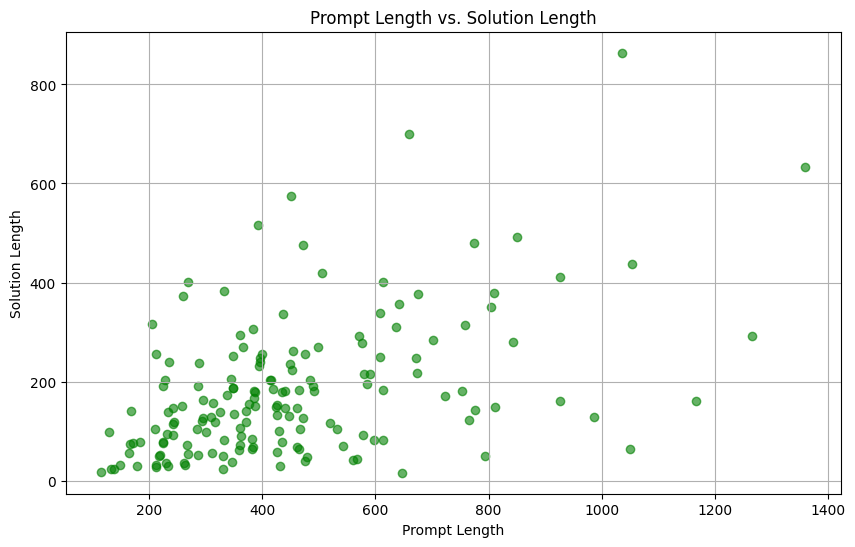

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Step 1: Load the dataset from Hugging Face
dataset = load_dataset("openai/openai_humaneval")
data = dataset['test']

# Step 2: Convert the dataset to a pandas DataFrame for easier analysis
df = pd.DataFrame(data)

# Preview the data
print(df.head())

# Step 3: Perform simple analysis
# Calculate the number of characters in each 'prompt' and 'canonical_solution'
df['prompt_length'] = df['prompt'].apply(len)
df['solution_length'] = df['canonical_solution'].apply(len)

# Summary statistics
print("Prompt Length Summary:")
print(df['prompt_length'].describe())

print("\nSolution Length Summary:")
print(df['solution_length'].describe())

# Step 4: Visualize the data using Matplotlib
# Histogram of prompt lengths
plt.figure(figsize=(12, 6))
plt.hist(df['prompt_length'], bins=20, alpha=0.5, color='b', label='Prompt Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Prompt Lengths')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

# Histogram of solution lengths
plt.figure(figsize=(12, 6))
plt.hist(df['solution_length'], bins=20, alpha=0.5, color='r', label='Solution Length')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.title('Distribution of Solution Lengths')
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

# Step 5: Scatter plot of prompt vs. solution lengths
plt.figure(figsize=(10, 6))
plt.scatter(df['prompt_length'], df['solution_length'], alpha=0.6, color='g')
plt.xlabel('Prompt Length')
plt.ylabel('Solution Length')
plt.title('Prompt Length vs. Solution Length')
plt.grid()
plt.show()


In [36]:
pip install pandas numpy matplotlib datasets


In [41]:
df.columns = df.columns.str.strip()
print(df.head())
print(df.columns)

                                             Context                                           Response
0  I'm going through some things with my feelings...  If everyone thinks you're worthless, then mayb...
1  I'm going through some things with my feelings...  Hello, and thank you for your question and see...
2  I'm going through some things with my feelings...  First thing I'd suggest is getting the sleep y...
3  I'm going through some things with my feelings...  Therapy is essential for those that are feelin...
4  I'm going through some things with my feelings...  I first want to let you know that you are not ...
Index(['Context', 'Response'], dtype='object')


                                             Context                                           Response
0  I'm going through some things with my feelings...  If everyone thinks you're worthless, then mayb...
1  I'm going through some things with my feelings...  Hello, and thank you for your question and see...
2  I'm going through some things with my feelings...  First thing I'd suggest is getting the sleep y...
3  I'm going through some things with my feelings...  Therapy is essential for those that are feelin...
4  I'm going through some things with my feelings...  I first want to let you know that you are not ...


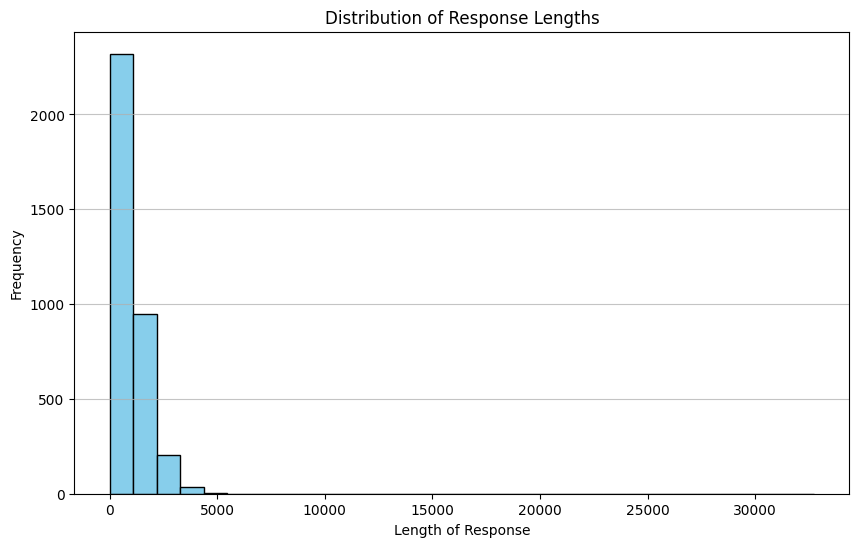

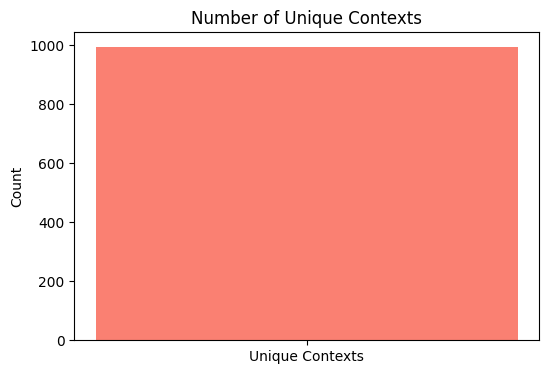

In [42]:
# Install necessary libraries if you haven't already
# !pip install datasets pandas matplotlib numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the dataset
dataset = load_dataset("Amod/mental_health_counseling_conversations")

# Convert to pandas DataFrame
df = pd.DataFrame(dataset['train'])

# Display the first few rows of the DataFrame
print(df.head())

# Example analysis: Calculate the length of responses and visualize the distribution
df['Response_Length'] = df['Response'].apply(len)

# Generate a histogram of response lengths
plt.figure(figsize=(10, 6))
plt.hist(df['Response_Length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Response Lengths')
plt.xlabel('Length of Response')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Example analysis: Calculate the number of unique contexts and visualize
unique_contexts = df['Context'].nunique()
plt.figure(figsize=(6, 4))
plt.bar(['Unique Contexts'], [unique_contexts], color='salmon')
plt.title('Number of Unique Contexts')
plt.ylabel('Count')
plt.show()


Available splits: DatasetDict({
    test: Dataset({
        features: ['video_id', 'duration', 'domain', 'sub_category', 'url', 'videoID', 'question_id', 'task_type', 'question', 'options', 'answer'],
        num_rows: 2700
    })
})
Using split: test
  video_id duration  ...                                            options answer
0      001    short  ...  [A. Apples., B. Candles., C. Berries., D. The ...      C
1      001    short  ...  [A. It is a news report that introduces the hi...      A
2      001    short  ...                       [A. 1., B. 4., C. 2., D. 3.]      D
3      002    short  ...  [A. Inkstone., B. Niche., C. Jade., D. Sacrifi...      C
4      002    short  ...  [A. Because it's from Ming Dynasty and of spec...      D

[5 rows x 11 columns]


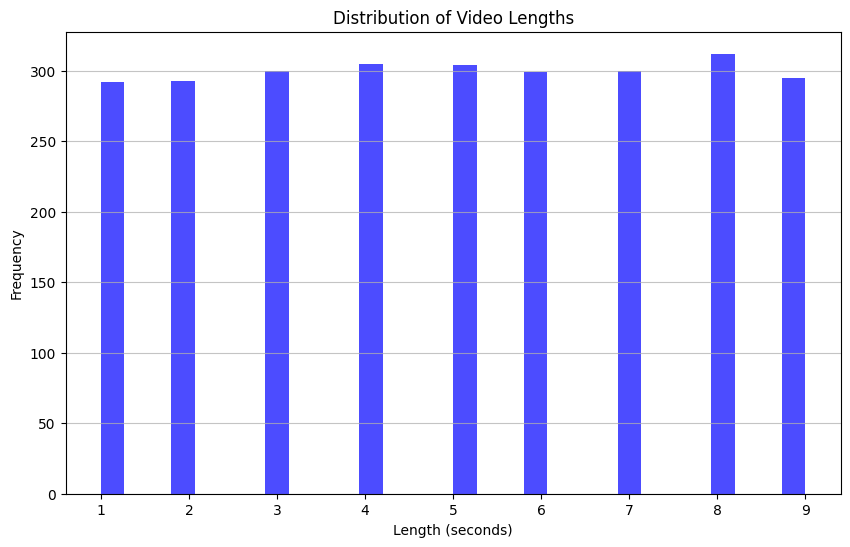

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("lmms-lab/Video-MME")

# Check available splits in the dataset
print("Available splits:", dataset)

# Assuming there might be splits like 'train', 'test', 'validation', etc.
# Get the first available split if 'train' does not exist
split_name = 'train' if 'train' in dataset else list(dataset.keys())[0]
print(f"Using split: {split_name}")

# Convert the selected split to a DataFrame
df = pd.DataFrame(dataset[split_name])

# Display the first few rows of the dataframe
print(df.head())

# Example: Let's assume we want to visualize a numerical column (e.g., video length or another numerical attribute)
# Check for the existence of a specific column that holds numerical values
# Replace 'length' with the actual column name in the dataset you wish to analyze
if 'length' in df.columns:
    video_lengths = df['length']
else:
    # Simulating lengths if not available; replace this with actual extraction
    # Example: Create a random numerical column for demonstration purposes
    video_lengths = np.random.randint(1, 10, size=len(df))

# Create a histogram of video lengths
plt.figure(figsize=(10, 6))
plt.hist(video_lengths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Video Lengths')
plt.xlabel('Length (seconds)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Available splits in the dataset:
DatasetDict({
    test: Dataset({
        features: ['task_id', 'prompt', 'declaration', 'canonical_solution', 'test', 'example_test'],
        num_rows: 164
    })
})
- test
First few rows of the DataFrame:
    task_id  ...                                       example_test
0  Python/0  ...  def check(has_close_elements):\n    assert has...
1  Python/1  ...  def check(separate_paren_groups):\n    assert ...
2  Python/2  ...  def check(truncate_number):\n    assert trunca...
3  Python/3  ...  def check(below_zero):\n    assert below_zero(...
4  Python/4  ...  def check(mean_absolute_deviation):\n    asser...

[5 rows x 6 columns]
Columns in the DataFrame:
Index(['task_id', 'prompt', 'declaration', 'canonical_solution', 'test',
       'example_test'],
      dtype='object')


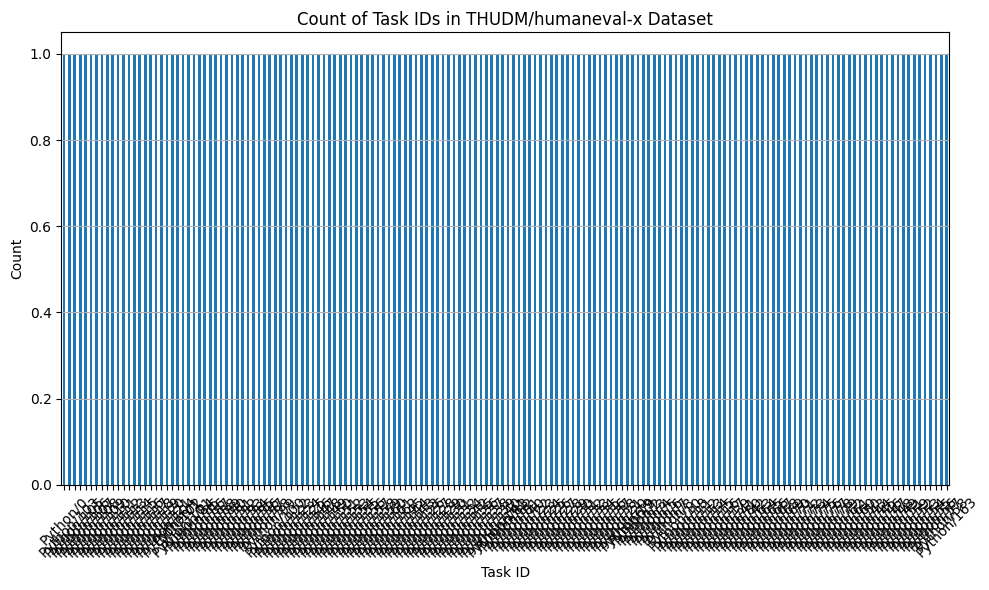

In [48]:
from datasets import load_dataset

# Load the dataset from Hugging Face
dataset = load_dataset("THUDM/humaneval-x")

# Check the available splits
print("Available splits in the dataset:")
print(dataset)

# You can list out the keys to check what's available
for split in dataset.keys():
    print(f"- {split}")

# Assuming 'test' split exists (modify according to what you see)
split_name = 'test'  # Change this based on the output from the available splits
df = dataset[split_name].to_pandas()

# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

# Check the columns in the DataFrame
print("Columns in the DataFrame:")
print(df.columns)

# Example analysis: Count the occurrences of a specific column (adjust based on available columns)
# Let's assume 'task_id' is a valid column name; adjust if necessary
if 'task_id' in df.columns:
    task_counts = df['task_id'].value_counts()

    # Create a bar graph to visualize the counts of task_ids
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    task_counts.plot(kind='bar')
    plt.title('Count of Task IDs in THUDM/humaneval-x Dataset')
    plt.xlabel('Task ID')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.tight_layout()  # Adjust layout to make room for labels
    plt.show()
else:
    print("Column 'task_id' does not exist in the DataFrame.")
